In [1]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = []
for f_name in glob.glob('eval_results*'):
    with open(f_name, 'r') as f:
        part = json.load(f)
        data.extend(part)

In [3]:
tst = pd.DataFrame.from_records([{'box_end_result_x': d['box_results'][-1][0],
                                  'box_end_result_y': d['box_results'][-1][1],
                                  'box_end_result_state': d['box_results'][1][2],
                                  'box_pre_result_x': d['box_results'][-3][0] if len(d['box_results'])>2 else None,
                                  'box_pre_result_y': d['box_results'][-3][1] if len(d['box_results'])>2 else None,
                                  'n_steps': len(d['box_results']),
                                  'target_x': d['target'][0],
                                  'target_y': d['target'][1],
                                  'how':d['how'],
                                 } for d in data])
tst['attempt']=tst['box_end_result_state'].apply(lambda x: 'attempted' if x!=-1 else 'aborted')
tst['final_state']=tst.apply(lambda x: 'success' if x['box_end_result_x']<-0.15
                                                 and x['box_end_result_x']>-0.35
                                                 and x['box_end_result_y']<-0.15
                                                 and x['box_end_result_y']>-0.35
                                                 else 'fail'
                             , axis = 1)
tst['state'] = tst.apply(lambda x: 'abort' if x['attempt']=='aborted' else x['final_state'],axis=1)
xlim = [-0.75,0.75]
ylim = [-0.75,0.75]

Text(0.5,0.98,u'start locations')

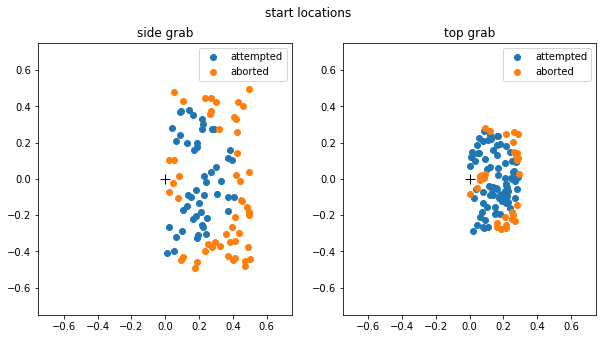

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
def plot_it(df,how,axs,ax_n,which,states,col='state'):
    for state in states:
        sub = df.loc[(df['how']==how) & (df[col]==state)]
        axs[ax_n].scatter(sub[which+'_x'],sub[which+'_y'],label=state)
    axs[ax_n].plot([0],[0],'k+',markersize=10)
    axs[ax_n].set_xlim(xlim)
    axs[ax_n].set_ylim(ylim)
    axs[ax_n].set_title(how+' grab')
    axs[ax_n].legend()
    
plot_it(tst,'side',axs,0,'target',['attempted','aborted'],col='attempt')
plot_it(tst,'top',axs,1,'target',['attempted','aborted'],col='attempt')
plt.suptitle('start locations')

In [5]:
tst.loc[tst['state']!='abort'].pivot_table(index='how', columns='state', values='n_steps', aggfunc=len)

state,fail,success
how,,
side,29,20
top,40,39


Text(0,0.5,u'count')

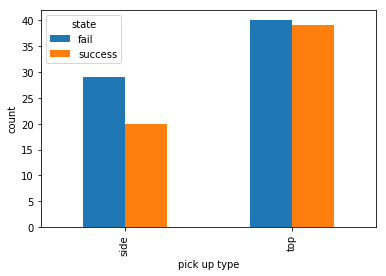

In [6]:
tst.loc[tst['state']!='abort'].pivot_table(index='how', columns='state', values='n_steps', aggfunc=len).plot.bar()
plt.xlabel('pick up type')
plt.ylabel('count')


Text(0.5,0.98,u'start locations')

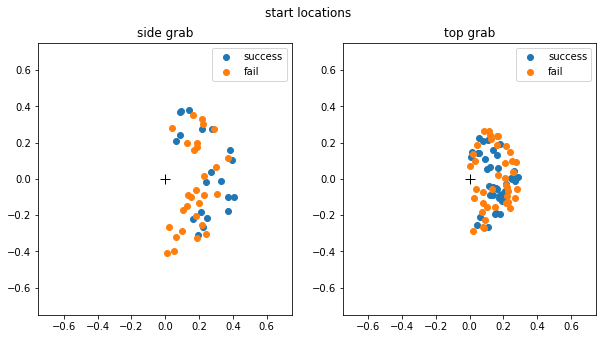

In [7]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

plot_it(tst,'side',axs,0,'target',['success','fail'])
plot_it(tst,'top',axs,1,'target',['success','fail'])
plt.suptitle('start locations')


Text(0.5,0.98,u'end locations')

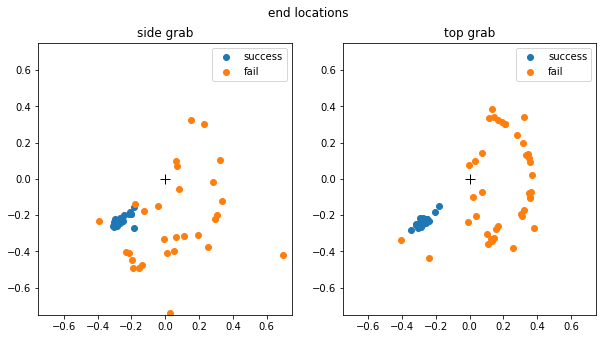

In [8]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

plot_it(tst,'side',axs,0,'box_end_result',['success','fail'])
plot_it(tst,'top',axs,1,'box_end_result',['success','fail'])
plt.suptitle('end locations')

Text(0.5,0.98,u'succesful pickup locations')

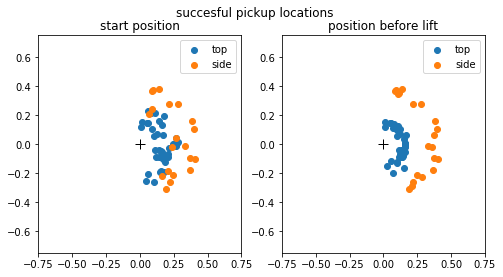

In [9]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
def plot_it_2(df,axs,ax_n,which,state,label):
    for how in ['top','side']:
        sub = df.loc[(df['state']==state) & (df['how']==how)]
        axs[ax_n].scatter(sub[which+'_x'],sub[which+'_y'],label=how)
    axs[ax_n].set_xlim(xlim)
    axs[ax_n].set_ylim(ylim)
    axs[ax_n].plot([0],[0],'k+',markersize=10)
    axs[ax_n].legend()
    axs[ax_n].set_title(label)

plot_it_2(tst,axs,0,'target','success','start position')
plot_it_2(tst,axs,1,'box_pre_result','success','position before lift')
plt.suptitle('succesful pickup locations')

Text(0.5,0.98,u'failed pickup locations')

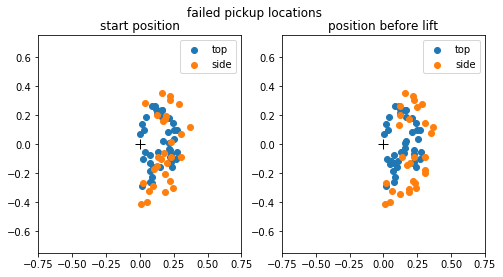

In [10]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
plot_it_2(tst,axs,0,'target','fail','start position')
plot_it_2(tst,axs,1,'box_pre_result','fail','position before lift')
plt.suptitle('failed pickup locations')